Text(0, 0.5, 'y')

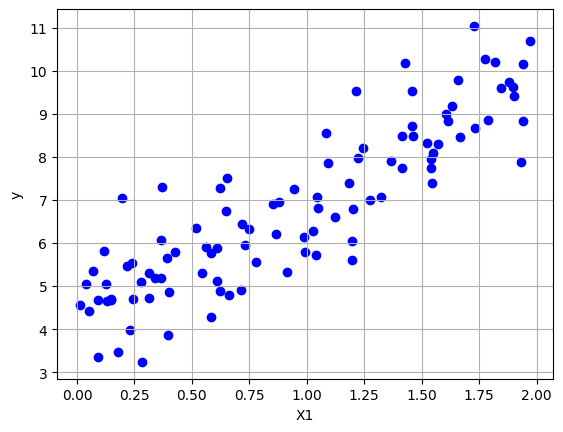

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

plt.scatter(X, y, color="blue")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

What the fuck is X_b

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

In [7]:
np.array([1, 2, 3]) @ np.array([[1], [2], [3]])

array([14])

In [8]:
y_predict = X_new_b @ theta_best

In [9]:
X_new_b @ theta_best

array([[4.21509616],
       [9.75532293]])

This is our prediction lol, why is it so weirdly looking, also why would multiplying with the theta itself is enough for that like wtf lol. like I'm not smart enough for that

In [10]:
y_predict

array([[4.21509616],
       [9.75532293]])

Text(0, 0.5, 'y')

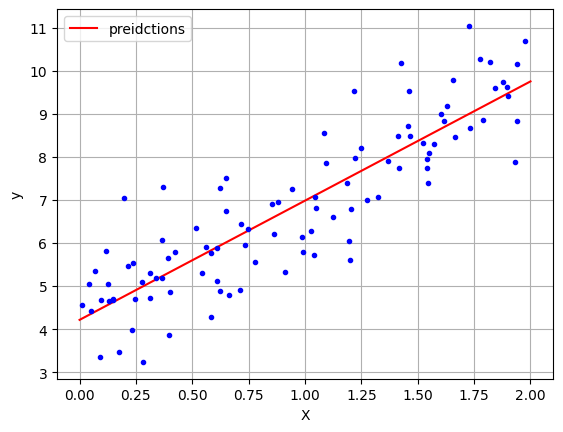

In [11]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="preidctions")
plt.plot(X, y, "b.")

plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("y")

Peforming Linear regression is pretty straightforward

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

theta_best_svd

array([[4.21509616],
       [2.77011339]])

### Gradient Descent

As the name suggest, we move slowly to the bottom to find the lowest point, therefore we called it gradient descent


In [15]:
eta = 0.1 # learning rate
n_epochs = 1000 # the number of iteration, each iteration is called an epoch

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized the starting point

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients # we reduce the current best guess with the step (eta * gradients)


#### Stochastic gradient descent

It means random descent, as in pick a random training instance calculate the theta and use that

In [26]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #     
                     #          parameter space to plot the next figure

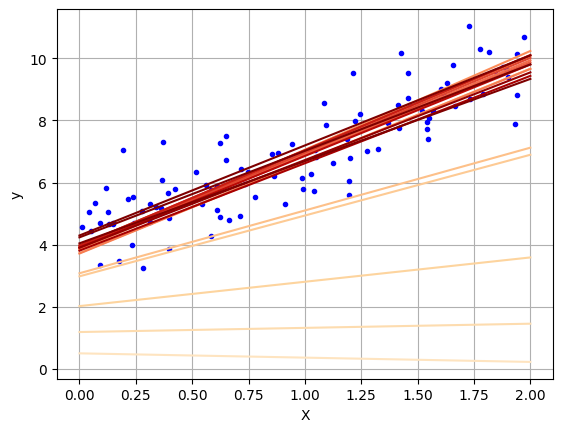

In [28]:
import matplotlib

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("X")
plt.ylabel("y")

n_shown = 20

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        
        # Code to draw a beautiful plot
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for stochastic (random) descent, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

        theta_path_sgd.append(theta)



In [ ]:
# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

The theta we get are fairly closed to what actually is happening lol, so a good estimate not the most optimal one lol lol lol lol